Лабораторна робота №7 Студентки групи БС-83 Харченко Софії

1. Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані мають відповідати вимогам викладеним вище. 

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
import math
import matplotlib.pyplot as plt
from numpy.random import randint

In [6]:
table1 = [85,78,62,60,95,84,96,74,98,66]
table2 = [65,77,61,97,94,86,68,71,85,74]
table = pd.DataFrame({
    'Група-1': table1,
    'Група-2': table2
}, index=np.arange(1, len(table1)+1))
table.columns.name = 'Сердній бал за семестр'
table.index.name = 'Номер студента'
table

Сердній бал за семестр,Група-1,Група-2
Номер студента,,
1,85,65
2,78,77
3,62,61
4,60,97
5,95,94
6,84,86
7,96,68
8,74,71
9,98,85


2. Побудувати графік, що відображає розкид даних в групах. Приклад:
![alt text](https://s3.amazonaws.com/libapps/accounts/2515/images/spss_paired-t_example_boxplot.PNG)

[Text(0, 0.5, 'Groups'), Text(0.5, 0, 'Marks')]

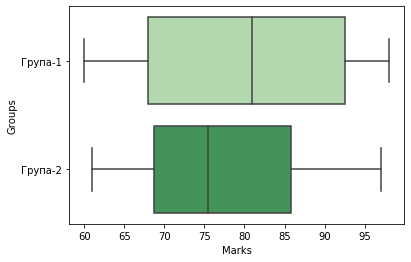

In [8]:
sns.boxplot(data=table, orient='h',palette='Greens').set(xlabel='Marks', ylabel='Groups')


Написати функцію для оцінки вімінностей дисперсій між групами за критерієм Лівеня. Функція має повертати значення тесту та результат оцінки рівності дисперсій (significant або not significant)

In [16]:
def sd(massiv,n):
    s=0
    mean=(sum(massiv))/n
    for i in range (n):
        s+=((massiv[i]-mean))**2
    return s/(n-1)
def livena(x,y):
    n=len(x)
    m=len(y)
    s1=sd(x,n)
    s2=sd(y,m)
    if s1>s2:
        f=s1/s2
    else:
        f=s2/s1
    print('Отримане значення критерію Лівеня : F = ' + str(f))
    df1=n-1
    df2=m-1
    print('Значення ступенів свободи: df1 = ' + str(df1) + "; df2 = " + str(df2))
    table = pd.read_excel("Liven.xlsx").iloc[df1,df2]
    print("Критичне значення критерію Лівеня = " + str(table))
    if f<table:
        result = "Оскільки значення критерію Лівеня менше, ніж його критичне значення, то результат оцінки значимості зв'зку - not significant"
    else:
        result = "Оскільки значення критерію Лівеня більше, ніж його критичне значення, то результат оцінки значимості зв'зку -  significant"
    return result

In [17]:
livena(table1,table2)

Отримане значення критерію Лівеня : F = 1.3339243498817963
Значення ступенів свободи: df1 = 9; df2 = 9
Критичне значення критерію Лівеня = 3.18


"Оскільки значення критерію Лівеня менше, ніж його критичне значення, то результат оцінки значимості зв'зку - not significant"

Функція для визначення відмінності між групами за критерієм Стьюдента в залежності від рівності/відмінності дисперсій. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

In [22]:
def student(x,y):
    flag="significant"
    if flag=="significant":
        n=len(x)
        m=len(y)
        s1=sd(x,n)
        s2=sd(y,m)
        m1=sum(x)/n
        m2=sum(y)/n
        df=n+m-2
        t=(abs(m1-m2))/(math.sqrt((s1/n)+(s2/m)))
    elif flag=="not significant":
        n=len(x)
        m=len(y)
        s1=sd(x,n)
        s2=sd(y,m)
        m1=sum(x)/n
        m2=sum(y)/n
        df1=n-1
        df2=m-1
        df=n+m-2
        k=(1/n)+(1/m)
        t=(abs(m1-m2))/(math.sqrt(((df1*s1+df2*s2)/df)*k))
    else:
        return "You input the wrong flag"
    print('Отримане значення критерію Стьюдента: t = ' + str(t))
    print('Значення ступеня свободи: df = ' + str(df))
    table = pd.read_excel("Stud.xlsx").iloc[df-1,1]
    print("Критичне значення критерію Стьюдента = " + str(table))
    if t<table:
        result = "Оскільки значення критерію Стьюдента менше, ніж його критичне значення, то результат оцінки значимості зв'зку - significant"
    else:
        result = "Оскільки значення критерію Стьюдента більше, ніж його критичне значення, то результат оцінки значимості зв'зку -  not significant"
    return result

In [23]:
student(table1,table2)

Отримане значення критерію Стьюдента: t = 0.3375691032488308
Значення ступеня свободи: df = 18
Критичне значення критерію Стьюдента = 2.101


"Оскільки значення критерію Стьюдента менше, ніж його критичне значення, то результат оцінки значимості зв'зку - significant"

Висновок:

1) В результаті перевірки даних на рівність дисперсії за тестом Лівеня було, отримано результат F < F_tabl. Отже потрібно прийняти нульову гіпотезу, тобто зробити висновок про статичну рівність дисперсій.

2) В результаті перевірки відмінності між двома групами за допомогою критерію Стюдента для незалежних вибірок, було отримано результат t > t_tabl. Отже, відхиляємо нульову гіпотезу (тобто приймаємо альтернативну), та робимо висновок про статичну відмінність середніх.